In [18]:
import pandas as pd

In [19]:
sample = 1000
cut_off_year = 2019
opf_data = pd.read_csv('/Users/baslad01/data_dump/openfoodfacts/product_data/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8', on_bad_lines='skip', nrows=sample)
opf_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.707748e+09,2024-02-12T14:25:39Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.707864e+09,2024-02-13T22:43:38Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1682646029,2023-04-28T01:40:29Z,isabel626,1.707844e+09,2024-02-13T17:00:47Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,1.707742e+09,2024-02-12T12:49:37Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,1.707490e+09,2024-02-09T14:47:36Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
opf_data_country = opf_data[['code','countries_en', 'created_datetime']]
# Get only the year from the created_datetime
opf_data_country['created_datetime'] = pd.to_datetime(opf_data_country['created_datetime'])
opf_data_country['created_datetime'] = opf_data_country['created_datetime'].dt.year
opf_data_country

/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64606/3610392728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['created_datetime'] = pd.to_datetime(opf_data_country['created_datetime'])
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64606/3610392728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['created_datetime'] = opf_data_country['created_datetime'].dt.year


,code,countries_en,created_datetime
0,225,France,2021
1,207025004,Germany,2022
2,3429145,Spain,2021
3,26772226,France,2022
4,17,France,2018
...,...,...,...
995,720,Belgium,2020
996,73013471,France,2018
997,73161622,France,2018
998,740,India,2021


In [21]:
# Get the count of the countries_en
opf_data_country['created_datetime'] = opf_data_country['created_datetime'].astype(int)
opf_data_country = opf_data_country[opf_data_country['created_datetime'] <= cut_off_year]
opf_data_country['countries_en'] = opf_data_country['countries_en'].astype(str).str.lower()
opf_data_country['countries_en'] = opf_data_country['countries_en'].str.split(',')
opf_data_country = opf_data_country.explode('countries_en')
opf_data_country

/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64606/2218578501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['created_datetime'] = opf_data_country['created_datetime'].astype(int)
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64606/2218578501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['countries_en'] = opf_data_country['countries_en'].astype(str).str.lower()
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64606/2218578501.

,code,countries_en,created_datetime
4,17,france,2018
5,31,france,2018
6,3327986,spain,2019
11,100,france,2015
12,123,france,2018
...,...,...,...
990,69168062,france,2018
994,71576503,france,2019
996,73013471,france,2018
997,73161622,france,2018


In [22]:
# Strip any leading/trailing whitespace from the country names
opf_data_country['countries_en'] = opf_data_country['countries_en'].str.strip()


country_count = opf_data_country['countries_en'].value_counts()
# Convert the Series to a DataFrame
country_count = country_count.reset_index()

# Rename the columns for clarity
country_count.columns = ['country', 'count']

country_count


,country,count
0,france,410
1,united states,193
2,united kingdom,13
3,germany,12
4,canada,9
5,spain,6
6,belgium,5
7,nan,3
8,switzerland,3
9,ireland,1


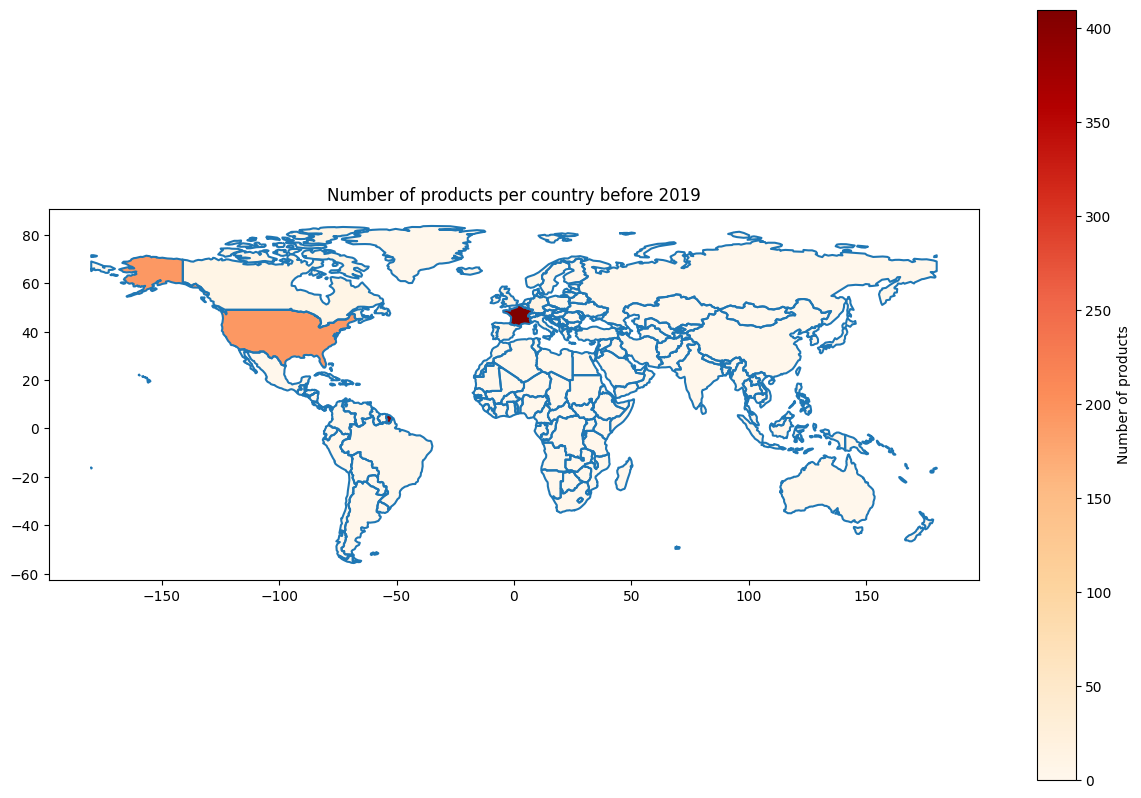

In [23]:
# Represent the country count in a map
import geopandas as gpd
import matplotlib.pyplot as plt

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world['SUBUNIT'] = world['SUBUNIT'].str.lower()

world = world[(world.POP_EST > 0) & (world.SUBUNIT != "antarctica")]


# Merge the world map with the country count
world = world.merge(country_count, left_on='SUBUNIT', right_on='country', how='left')
world['count'] = world['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Number of products"}, cmap='OrRd', missing_kwds={"color": "lightgrey"})
plt.title(f'Number of products per country before {cut_off_year}')
plt.show()

In [24]:
country_count

,country,count
0,france,410
1,united states,193
2,united kingdom,13
3,germany,12
4,canada,9
5,spain,6
6,belgium,5
7,nan,3
8,switzerland,3
9,ireland,1


In [25]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,country,count
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,0.0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,0.0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.0
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",canada,9.0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",united states,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,0.0
172,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",NaN,0.0
173,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,0.0
174,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",NaN,0.0
